## Proposal: Forecasting Total Jobs and Industry Analysis in Melbourne
### 1. Introduction:
This proposal aims to conduct an in-depth analysis of business establishments and jobs data in Melbourne, focusing on forecasting total jobs in different areas of Melbourne. By leveraging the provided dataset on Business Establishments and Jobs Data by Business Size and Industry, I intend to uncover insights into job distribution, industry dynamics, and their implications for economic development.

### 2. Objectives:
+ Forecast total jobs in various areas of Melbourne based on business establishments data and related variables.
+ Analyze the distribution of business establishments and jobs across different business sizes and industries in Melbourne.
+ Identify key industry sectors contributing significantly to job creation and economic growth.
+ Assess the relationship between business size and job creation, highlighting trends and patterns.
Provide actionable insights for stakeholders to support decision-making processes related to workforce planning and economic strategies.

### 3. Methodology:
+ Data Collection: Gather the Business Establishments and Jobs Data by Business Size and Industry dataset provided for Melbourne.
+ Data Cleaning and Preparation: Clean and preprocess the dataset to ensure data accuracy and consistency.
+ Data Analysis: Utilize statistical analysis and data visualization techniques to explore job distribution by business size and industry categories.
+ Prediction: Forecasted total job numbers for different areas of Melbourne based on business establishments data and related variables by applying appropriate machine learning models and methods.
+ Reporting: Generate detailed reports and visualizations to present findings and insights.


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import io
pd.set_option('display.max_columns', None)
from scipy import stats


### Function to collect dataset through API

In [2]:

def datasetcollect(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = " "
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Dataset: Business establishments and jobs data by business size and industry

In [3]:
dataset = 'business-establishments-and-jobs-data-by-business-size-and-industry'
buss_est = datasetcollect(dataset)
print(len(buss_est))

14692


#### Doing analysis on the dataset

In [4]:
buss_est.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


In [5]:
buss_est.describe()

,census_year,total_establishments,total_jobs
count,14692.000000,14692.000000,10365.000000
mean,2012.155799,64.711135,2458.545586
std,6.016973,485.857098,12828.616392
min,2002.000000,1.000000,0.000000
25%,2007.000000,2.000000,39.000000
50%,2012.000000,6.000000,190.000000
75%,2017.000000,18.000000,890.000000
max,2022.000000,12870.000000,273200.000000


In [6]:
buss_est.count()

census_year             14692
clue_small_area         14692
anzsic_indusrty         14692
clue_industry           14692
business_size           14692
total_establishments    14692
total_jobs              10365
dtype: int64

In [7]:
missing_values = buss_est.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64


#### There are missing values in the "total_jobs" column, with only 10,365 entries out of the total 14,692.

### Descriptive Analysis


In [8]:
summary_stats = buss_est.groupby('clue_industry')[['total_establishments', 'total_jobs']].sum()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                                             total_establishments  total_jobs
clue_industry                                                               
Accommodation                                              11048    353380.0
Admin and Support Services                                 27360    542547.0
Agriculture and Mining                                      2630    101691.0
All CLUE Industry                                         316912   8803643.0
Arts and Recreation Services                               23330    862438.0
Business Services                                         105570   2851776.0
Construction                                               11470    189123.0
Education and Training                                     21272    884214.0
Electricity, Gas, Water and Waste Services                  7856    295519.0
Finance and Insurance                                      36928   2419405.0
Food and Beverage Services                            

 *These statistics provide a snapshot of the distribution of establishments and jobs across different industries in Melbourne based on the CLUE industry classification. It's clear that certain industries such as Business Services, Finance and Insurance, Health Care, and Public Administration have a significant number of establishments and jobs, reflecting their importance in the local economy. Understanding these industry-specific trends can be valuable for workforce planning, economic development strategies, and investment decisions.*

#### Visualize total jobs and establishments by industry

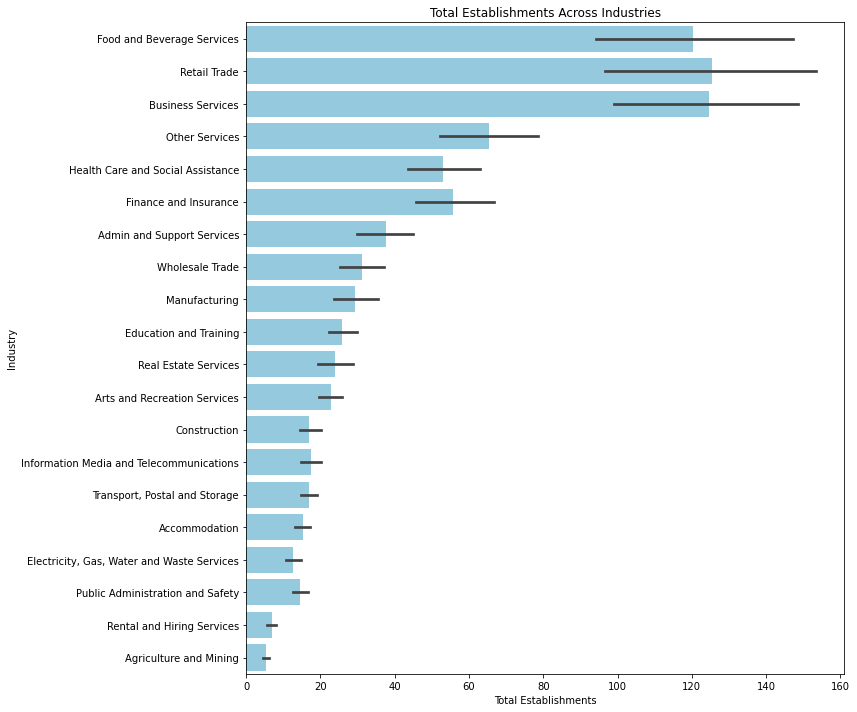

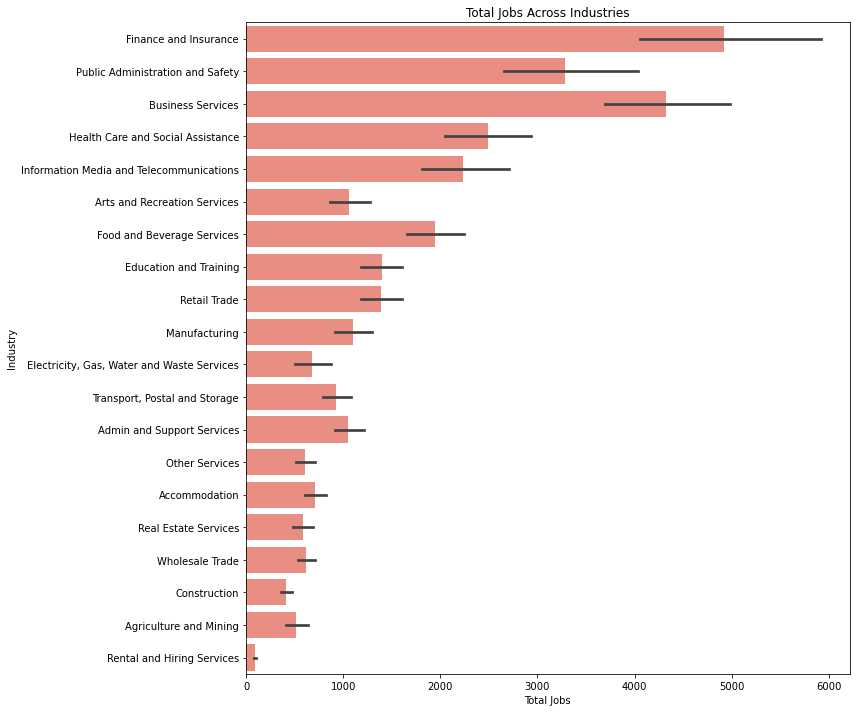

In [9]:
# Sort industries by total jobs 
df_sorted_jobs = buss_est.sort_values(by='total_jobs', ascending=False)
df_sorted_establishments = buss_est.sort_values(by='total_establishments', ascending=False)

df_sorted_jobs = df_sorted_jobs[df_sorted_jobs['clue_industry'] != 'All CLUE Industry']
df_sorted_establishments = df_sorted_establishments[df_sorted_establishments['clue_industry'] != 'All CLUE Industry']

# Visualize total establishments by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_establishments', y='clue_industry', data=df_sorted_establishments, color='skyblue')
plt.xlabel('Total Establishments')
plt.ylabel('Industry')
plt.title('Total Establishments Across Industries')
plt.tight_layout()
plt.show()

# Visualize total jobs by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_jobs', y='clue_industry', data=df_sorted_jobs, color='salmon')
plt.xlabel('Total Jobs')
plt.ylabel('Industry')
plt.title('Total Jobs Across Industries')
plt.tight_layout()
plt.show()

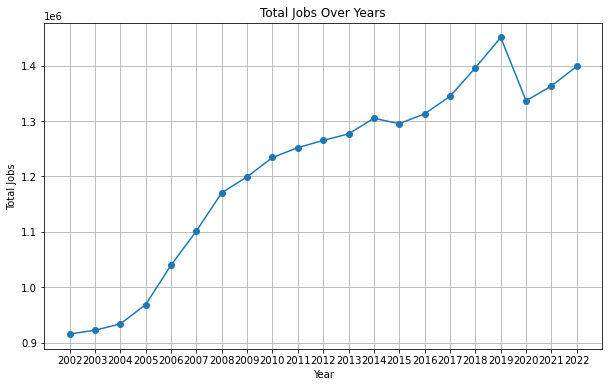

In [10]:
# Group by census_year and sum total_jobs
df_yearly = buss_est.groupby('census_year')['total_jobs'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['census_year'], df_yearly['total_jobs'], marker='o')
plt.title('Total Jobs Over Years')
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.xticks(df_yearly['census_year'])
plt.grid(True)
plt.show()

### Choose features for applying model

In [11]:
df_fc = buss_est.drop(['census_year'], axis = 1)
df_fc.head()

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


#### Print rows with NaN values in 'total_jobs' column


In [12]:
nan_rows = df_fc[df_fc['total_jobs'].isnull()]
nan_rows

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
2,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
5,West Melbourne (Residential),Wholesale Trade,Wholesale Trade,Non employing,2,NaN
14,Carlton,Wholesale Trade,Wholesale Trade,Non employing,1,NaN
15,Docklands,Accommodation and Food Services,Food and Beverage Services,Large business,1,NaN
...,...,...,...,...,...,...
14674,West Melbourne (Industrial),Information Media and Telecommunications,Information Media and Telecommunications,Small business,2,NaN
14679,West Melbourne (Industrial),Wholesale Trade,Wholesale Trade,Non employing,1,NaN
14681,West Melbourne (Residential),"Electricity, Gas, Water and Waste Services","Electricity, Gas, Water and Waste Services",Medium business,1,NaN
14682,West Melbourne (Residential),Financial and Insurance Services,Finance and Insurance,Medium business,1,NaN


*As we can see from the data the nan values of total jobs come along with the small number of total establishments, so we can replace nan with 0*

#### Replace NaN values with 0

In [13]:
df_fc['total_jobs'] = df_fc['total_jobs'].fillna(0)
df_fc.head()

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,0.0
1,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,0.0
3,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


### Dealing with outliers

In [14]:
df_fc.shape

(14692, 6)

In [24]:
# Calculate Z-score for 'total_jobs'
z_scores = stats.zscore(df_fc['total_jobs'])
z_scores

0       -0.160113
1       -0.144328
2       -0.160113
3       -0.160113
4       -0.156236
           ...   
14687   -0.147282
14688   -0.144235
14689   -0.160113
14690   -0.124019
14691   -0.160113
Name: total_jobs, Length: 14692, dtype: float64

In [26]:
# Define a threshold for outlier detection 
threshold = 3

# Identify outliers based on Z-score
outliers_indices = df_fc.index[abs(z_scores) > threshold]
print("Outliers Detected:")
df_fc.loc[outliers_indices]

Outliers Detected:


,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
4291,City of Melbourne (total),"Professional, Scientific and Technical Services",Business Services,Large business,80,40655.0
4292,City of Melbourne (total),Public Administration and Safety,Public Administration and Safety,Large business,61,43342.0
4314,City of Melbourne (total),"Professional, Scientific and Technical Services",Business Services,Large business,78,39702.0
4447,City of Melbourne (total),Financial and Insurance Services,Finance and Insurance,Large business,46,47374.0
4509,City of Melbourne (total),"Professional, Scientific and Technical Services",Business Services,Large business,65,34272.0
...,...,...,...,...,...,...
14334,City of Melbourne (total),All ANZSIC,All CLUE Industry,Medium business,2388,124287.0
14335,City of Melbourne (total),All ANZSIC,All CLUE Industry,Large business,350,240740.0
14337,City of Melbourne (total),All ANZSIC,All CLUE Industry,Medium business,2247,120857.0
14340,City of Melbourne (total),All ANZSIC,All CLUE Industry,Medium business,2000,104465.0


In [27]:
# Handling outliers: Option 1 - Remove outliers
df_fc = df_fc.drop(outliers_indices)
print("\nData after removing outliers:")
df_fc



Data after removing outliers:


,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,0.0
1,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,0.0
3,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0
...,...,...,...,...,...,...
14687,West Melbourne (Residential),Manufacturing,Manufacturing,Small business,23,139.0
14688,West Melbourne (Residential),Other Services,Other Services,Medium business,6,172.0
14689,West Melbourne (Residential),Other Services,Other Services,Non employing,4,0.0
14690,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Small business,76,391.0


### Applying model

I decided to apply Random Forest for this dataset as a couple of reasons:
+ Handling Non-linearity:
Random Forest is effective at capturing non-linear relationships between features and the target variable. In this dataset, the relationship between clue_small_area, anzsic_indusrty, clue_industry, business_size, total_establishments, and total_jobs may not be linear. For example, the impact of business size on total jobs or the influence of specific industries on job numbers can be complex and non-linear. Random Forest can model these relationships more flexibly compared to linear regression models.
+ Handling Categorical Variables:
The dataset includes categorical variables such as clue_small_area, anzsic_indusrty, clue_industry, and business_size. This ensures that the model can interpret and utilize these categorical features effectively in making predictions.

In [15]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df_fc, columns=['clue_small_area', 'anzsic_indusrty', 'clue_industry', 'business_size'])

# Split data into features (X) and target variable (y)
X = df.drop(['total_jobs'], axis=1)
y = df['total_jobs']

# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Initialize and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Model evaluation

In [16]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 105.38238114826555
Root Mean Squared Error (RMSE): 470.31275714942785
R-squared (R2) Score: 0.9970612816210338


### Plotting the accuracy performance on the test dataset compared to the actual dataset

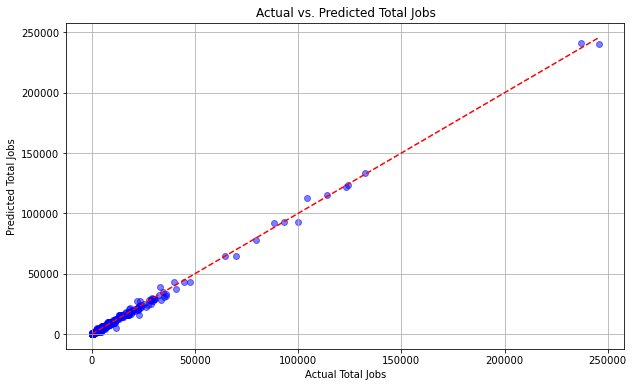

In [17]:
# Create a scatter plot or line plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot with transparency
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Total Jobs')
plt.xlabel('Actual Total Jobs')
plt.ylabel('Predicted Total Jobs')
plt.grid(True)
plt.show()

### Input new data into trained Random Forest Regression model and obtain predictions for the total jobs

In [18]:
new_data = pd.DataFrame({
    'clue_small_area': ['West Melbourne (Residential)'],
    'anzsic_indusrty': ['Health Care and Social Assistance'],
    'clue_industry': ['Health Care and Social Assistance'],
    'business_size': ['Large business'],
    'total_establishments': [50]
})

# Perform preprocessing steps on the new data (e.g., one-hot encoding)
new_data_encoded = pd.get_dummies(new_data, columns=['clue_small_area', 'anzsic_indusrty', 'clue_industry', 'business_size'])

# Ensure the new data columns match the columns used during training
missing_columns = set(X_train.columns) - set(new_data_encoded.columns)
for column in missing_columns:
    new_data_encoded[column] = 0  # Add missing columns with default values (could be improved based on business logic)

# Make predictions on the new data using the trained model
predicted_jobs = model.predict(new_data_encoded)

# Print the predicted total jobs
print("Predicted Total Jobs:", predicted_jobs)

Predicted Total Jobs: [129.295]


In [19]:
new_data_encoded

,total_establishments,clue_small_area_West Melbourne (Residential),anzsic_indusrty_Health Care and Social Assistance,clue_industry_Health Care and Social Assistance,business_size_Large business,clue_small_area_Melbourne (Remainder),clue_industry_Construction,clue_industry_Retail Trade,clue_industry_Other Services,clue_small_area_South Yarra,clue_small_area_West Melbourne (Industrial),anzsic_indusrty_Retail Trade,clue_small_area_North Melbourne,anzsic_indusrty_All ANZSIC,"anzsic_indusrty_Agriculture, Forestry and Fishing",anzsic_indusrty_Other Services,clue_small_area_Port Melbourne,business_size_Small business,clue_industry_Food and Beverage Services,anzsic_indusrty_Administrative and Support Services,clue_small_area_East Melbourne,anzsic_indusrty_Mining,"anzsic_indusrty_Transport, Postal and Warehousing",business_size_Non employing,anzsic_indusrty_Financial and Insurance Services,clue_industry_Education and Training,anzsic_indusrty_Education and Training,clue_industry_Admin and Support Services,clue_industry_Information Media and Telecommunications,clue_small_area_Carlton,clue_small_area_Southbank,clue_industry_Arts and Recreation Services,"anzsic_indusrty_Electricity, Gas, Water and Waste Services","anzsic_indusrty_Professional, Scientific and Technical Services","clue_industry_Electricity, Gas, Water and Waste Services",anzsic_indusrty_Wholesale Trade,clue_industry_All CLUE Industry,clue_small_area_Kensington,clue_small_area_Parkville,clue_industry_Finance and Insurance,clue_industry_Business Services,anzsic_indusrty_Information Media and Telecommunications,clue_small_area_Melbourne (CBD),"clue_industry_Transport, Postal and Storage","anzsic_indusrty_Rental, Hiring and Real Estate Services",clue_industry_Rental and Hiring Services,clue_small_area_Docklands,business_size_Medium business,anzsic_indusrty_Arts and Recreation Services,anzsic_indusrty_Accommodation and Food Services,anzsic_indusrty_Construction,clue_industry_Accommodation,clue_industry_Agriculture and Mining,clue_small_area_City of Melbourne (total),clue_industry_Real Estate Services,anzsic_indusrty_Manufacturing,clue_industry_Wholesale Trade,anzsic_indusrty_Public Administration and Safety,clue_industry_Manufacturing,clue_industry_Public Administration and Safety
0,50,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
!pip install ipywidgets


You should consider upgrading via the '/Users/boapoa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [21]:
import folium
from ipywidgets import interact, Dropdown

# Sample data for dropdown options
areas = ['West Melbourne (Residential)', 'East Melbourne (Business)', 'North Melbourne (Industrial)']
industries = ['Health Care and Social Assistance', 'Manufacturing', 'Finance and Insurance']
clue_industries = ['Health Care and Social Assistance', 'Manufacturing', 'Business Services']
business_sizes = ['Large business', 'Medium business', 'Small business']

# Function to update map based on selections
def update_map(area, industry, clue_industry, business_size):
    # Replace this with your actual prediction logic
    predicted_jobs = 1000  # Sample prediction
    
    # Create Folium map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

    # Add marker for predicted jobs
    folium.Marker(location=[-37.8136, 144.9631], popup=f"Area: {area}<br>Total Jobs: {predicted_jobs}").add_to(melbourne_map)

    # Display the map
    display(melbourne_map)

# Create dropdown widgets
area_dropdown = Dropdown(options=areas, description='Area:')
industry_dropdown = Dropdown(options=industries, description='Industry:')
clue_industry_dropdown = Dropdown(options=clue_industries, description='CLUE Industry:')
business_size_dropdown = Dropdown(options=business_sizes, description='Business Size:')

# Create interactive map
interact(update_map, area=area_dropdown, industry=industry_dropdown, clue_industry=clue_industry_dropdown, business_size=business_size_dropdown);


interactive(children=(Dropdown(description='Area:', options=('West Melbourne (Residential)', 'East Melbourne (…